In [ ]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO

from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!yolo task=detect mode=train model=yolov8n.pt data="/kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/data.yaml" epochs=25 plots=True

Ultralytics 8.3.193 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o

In [17]:
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, confusion_matrix, jaccard_score

# Load model
model = YOLO("/kaggle/working/runs/detect/train5/weights/best.pt")  # or "yolov8m.pt" if fine-tuned in-place


# Evaluate on full validation set to get metrics
metrics = model.val(data="/kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/data.yaml")

# Print built-in YOLOv8 metrics
print("YOLOv8 Evaluation Metrics:")
for key, value in metrics.results_dict.items():
    print(f"{key}: {value:.4f}")

Ultralytics 8.3.193 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 138.9±43.9 MB/s, size: 62.2 KB)
val: Scanning /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/labels... 31 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 31/31 684.0it/s 0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.0it/s 1.0s1.7s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         31         93      0.998          1      0.995      0.769
                  fake         26         54      0.998          1      0.995      0.758
                  true         20         39      0.998          1      0.995      0.781
Speed: 0.2ms preprocess, 9.2ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to /kaggle/working/runs/detect/val6
YOLOv8 Evaluation Metrics:
metrics/precision(B): 0.9981
metrics/recall(B): 1.0000
metrics/mAP50(B): 0.9950
metrics/mAP50-95(B): 0.7694
fitness: 0.7919



image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/Upto-4th-Sem-Markscard_page-0002_jpg.rf.785bcc426aef679954ced38a1d742607.jpg: 640x640 3 trues, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


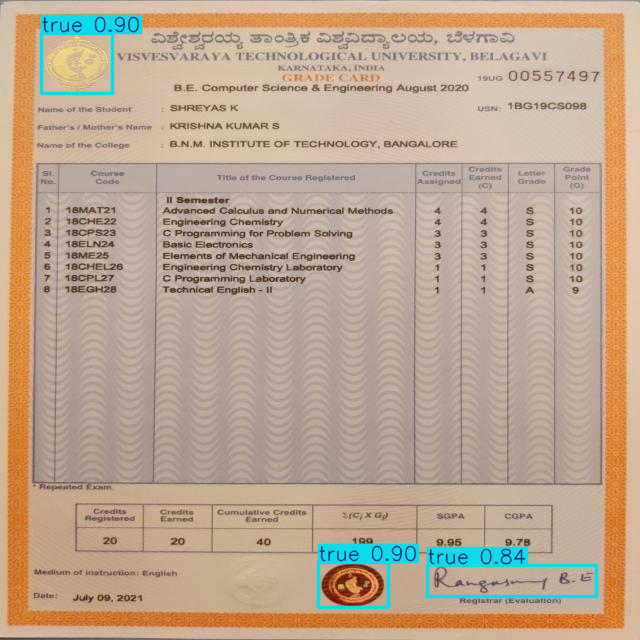


image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/Upto-4th-Sem-Markscard_page-0003_jpg.rf.01523de7c6a1ae15e5932f46c2d34be3.jpg: 640x640 3 trues, 6.1ms
Speed: 1.3ms preprocess, 6.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


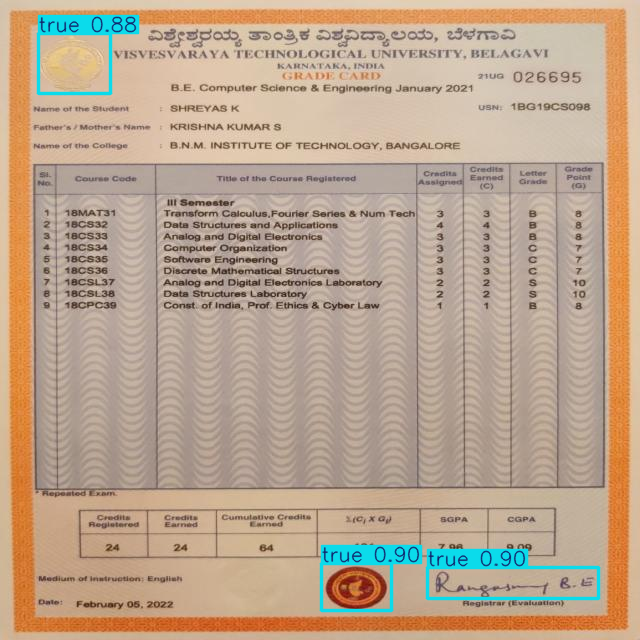


image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/Upto-4th-Sem-Markscard_page-0004_jpg.rf.31c544d70dc91a650899295635d3ccbb.jpg: 640x640 3 trues, 6.3ms
Speed: 1.5ms preprocess, 6.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


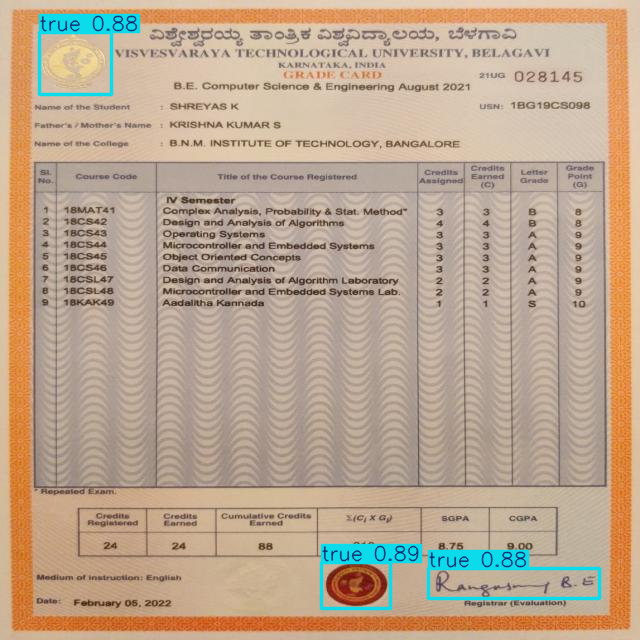


image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/Upto-4th-Sem-Markscard_page-0004_jpg.rf.5cbb72d8c246b55680c482d314b1edb6.jpg: 640x640 3 trues, 6.3ms
Speed: 1.4ms preprocess, 6.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


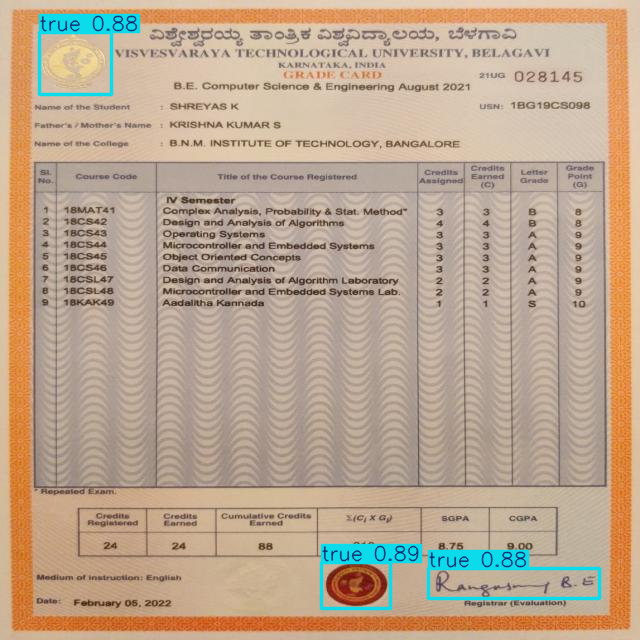


image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/Upto-4th-Sem-Markscard_page-0004_jpg.rf.dc6a746baf2c9c0da957d820922f8856.jpg: 640x640 3 trues, 6.0ms
Speed: 1.3ms preprocess, 6.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


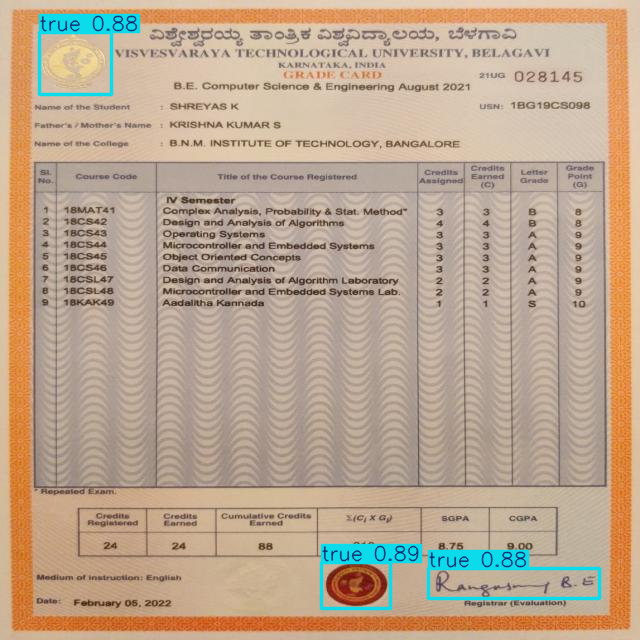


image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/f10_jpg.rf.ae5cc8e0b9df7294d47e80eeaa2779c6.jpg: 640x640 3 fakes, 6.3ms
Speed: 1.3ms preprocess, 6.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


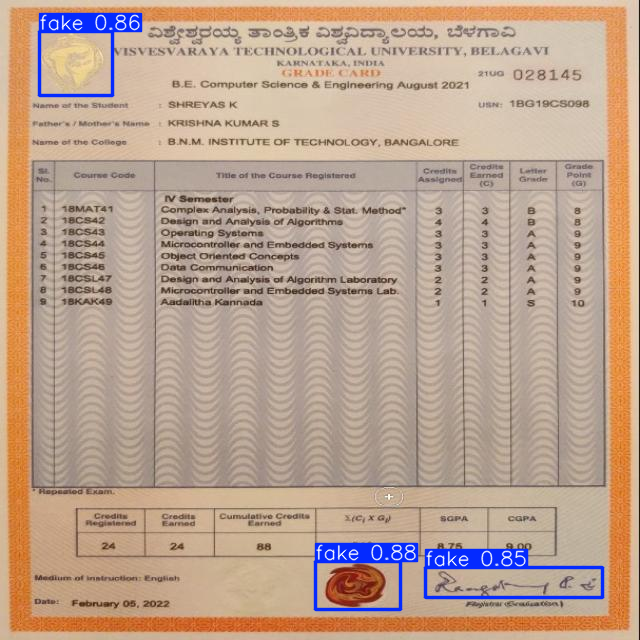


image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/f1_png.rf.029996f845fcea2f1e17351ad88ed765.jpg: 640x640 1 fake, 2 trues, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


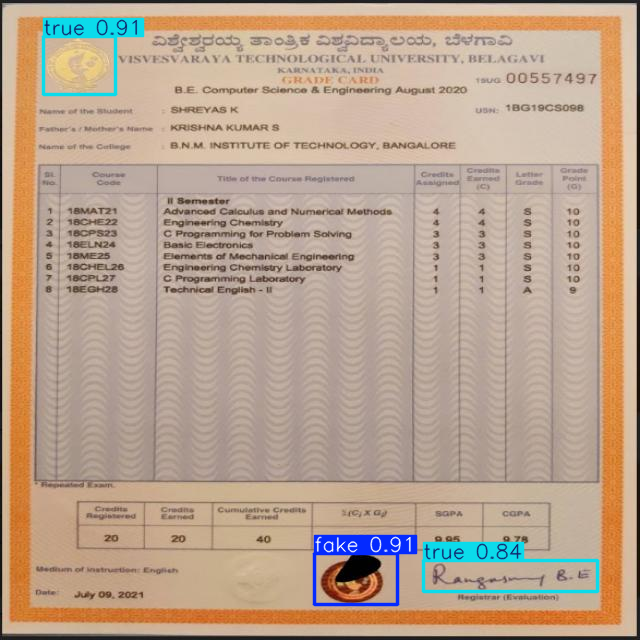


image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/f1_png.rf.79bea9b4359e9549974fd08d3c379b0e.jpg: 640x640 1 fake, 2 trues, 7.6ms
Speed: 1.6ms preprocess, 7.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


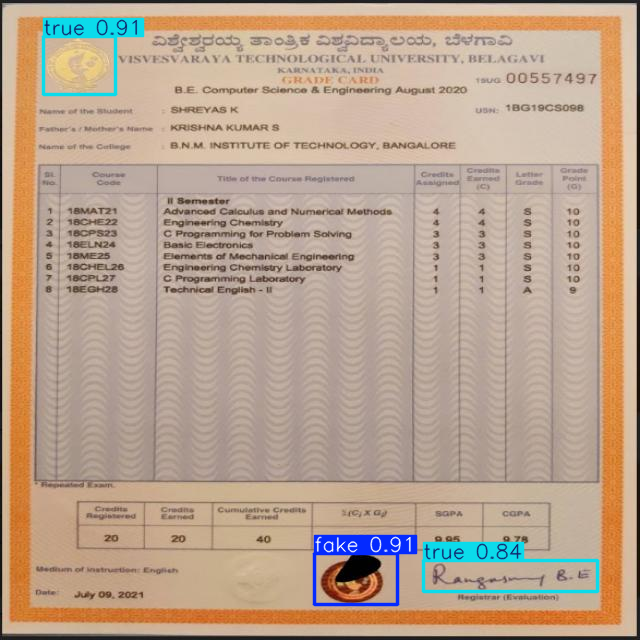


image 1/1 /kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images/f1_png.rf.ca96792bab082e93407eae0287178a72.jpg: 640x640 1 fake, 2 trues, 7.5ms
Speed: 1.5ms preprocess, 7.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
from ultralytics import YOLO
import cv2
import os
import matplotlib.pyplot as plt

# Load YOLO model
model = YOLO("/kaggle/working/runs/detect/train5/weights/best.pt")

# Path to validation images directory
val_img_dir = "/kaggle/input/educational-forge-unforge/Certificate forgery detection.v1i.yolov8-obb (1)/valid/images"
valid_exts = ['.jpg', '.jpeg', '.png']

# Iterate through each validation image
for img_file in sorted(os.listdir(val_img_dir)):
    if any(img_file.lower().endswith(ext) for ext in valid_exts):
        img_path = os.path.join(val_img_dir, img_file)

        # Perform inference
        results = model(img_path, conf=0.25)

        # Show prediction image with bounding boxes
        results[0].show()
